# The Sparks Foundation #GRIPMAR21

# Prediction using unsupervised ML

## Submitted by Ishaan Buch

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [152]:
#Importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import neighbors,datasets,metrics
from sklearn.cluster import KMeans 
import seaborn as sns

Importing the dataset through sklearn

In [153]:
#Loading the dataset
iris = datasets.load_iris()
X = iris.data[:, :3]
Y = iris.target
df = pd.DataFrame(iris.data, columns = feature_columns)
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.25, random_state=1)

Firstly, we understand the dataset


In [151]:
X.shape

(150, 3)

In [150]:
Y.shape

(150,)

In [145]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [148]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [149]:
df.size

600

#### There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset.

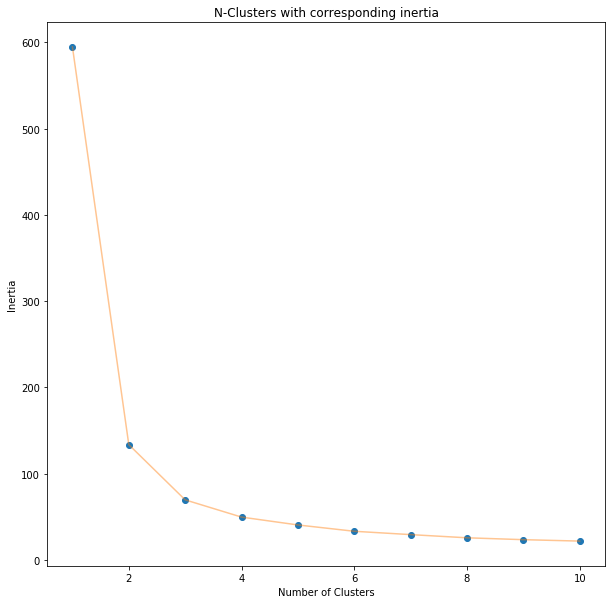

The optimal value for k is 3 (Elbow method)


In [163]:
inert = []
for i in range(1,11):
    k = KMeans(init = "k-means++", n_clusters = i, n_init = 12)
    k.fit(X)
    inert.append(k.inertia_)

plt.title("N-Clusters with corresponding inertia")
plt.plot(np.arange(1 , 11) , inert , 'o')
plt.plot(np.arange(1 , 11) , inert , '-' , alpha = 0.45)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()
print("The optimal value for k is 3 (Elbow method)")

Through the graph below we are able to understand the distribution of datapoint of 3 variables

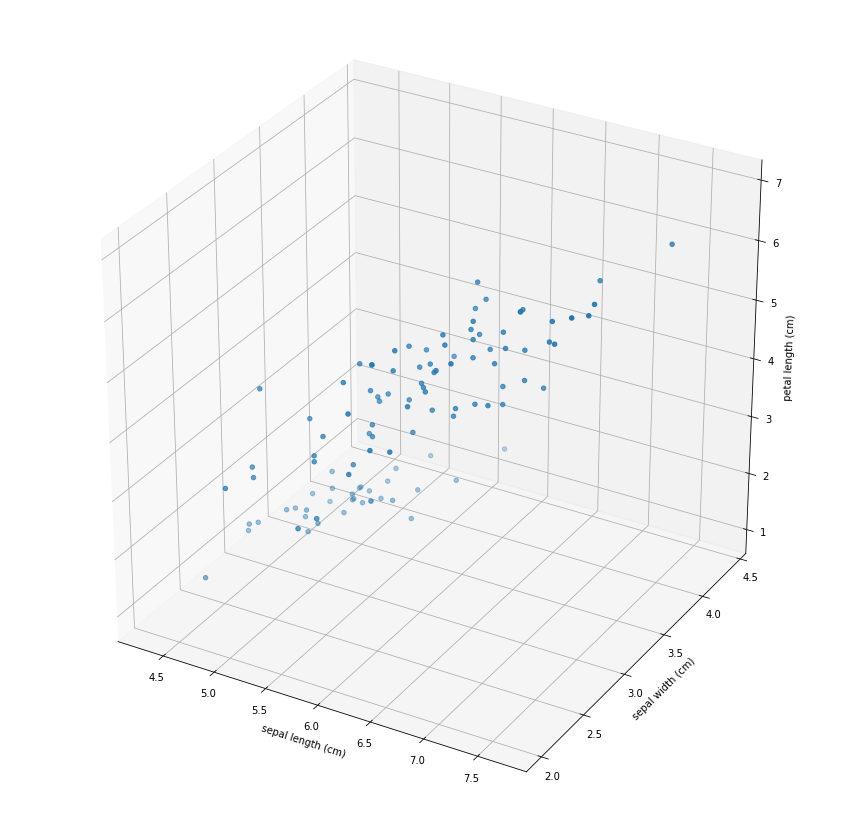

In [143]:
# Plot also the training points 
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = x_train[:, 0]
y = x_train[:, 1]
z = x_train[:, 2]

ax.scatter(x, y, z)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')

plt.rcParams["figure.figsize"] = (10,10)
plt.show()

Through a pair plot we are able to understand the relation between the variables

<Figure size 432x288 with 0 Axes>

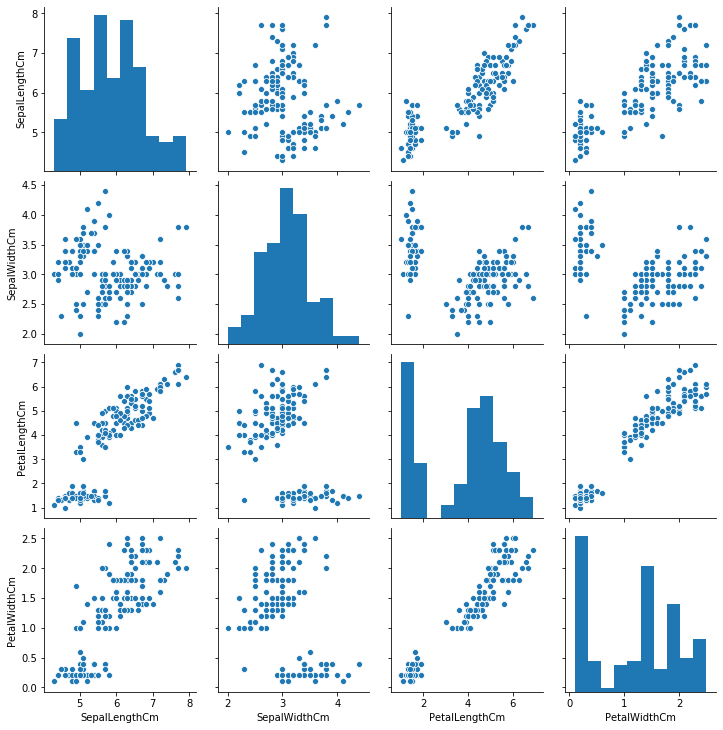

In [122]:
plt.figure()
sns.pairplot(df)
plt.show()

## Performing K means clustering

In [157]:
k = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k.fit(X)

The optimal value for k is 3 (Elbow method)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [162]:
k_labels = k.labels_
k_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

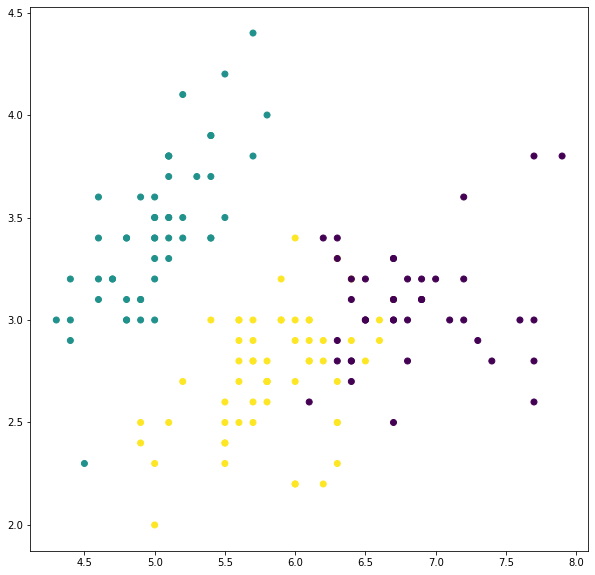

In [160]:
plt.scatter(X[:,0],X[:,1],c=k_labels)